In [1]:
import os
import pandas as pd
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import to_rgba
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Palatino"
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
print(os.getenv("PATH"))

%matplotlib inline
%config InlineBackend.figure_format='retina'

/home/jiet/code/TBAL/env/bin:/home/jiet/.vscode-server/cli/servers/Stable-e170252f762678dec6ca2cc69aba1570769a5d39/server/bin/remote-cli:/home/jiet/.nvm/versions/node/v21.7.1/bin:/home/jiet/neovim/bin:/home/jiet/code/TBAL/env/bin:/home/jiet/anaconda3/bin:/home/jiet/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/Library/TeX/texbin


In [2]:
unique = 0
def extract_values_from_directory(directory, data=None):
    global unique
    # Create if not in recursion 
    if data is None:
        data = []
    for name in os.listdir(directory):
        path = os.path.join(directory, name)
        
        # Recurse directory tree
        if os.path.isdir(path):
            extract_values_from_directory(path, data)
        else:
            # Read the log file present in the leaf directory
            if name.endswith(".log"):
                row_values = {}
                # Extract config metadata from path name 
                for dir_name in directory.split(os.sep):
                    if "__" in dir_name:
                        key, value = dir_name.split("__")
                        row_values[key] = value
                        
                # Set a unique id for each unique config for easy aggregation
                if row_values['seed'] == '1':
                    unique += 1
                row_values['unique_config'] = unique 
                
                # Read the log file to get time elapsed for the experiment
                with open(path, "r") as file:
                    lines = file.readlines()
                    
                    # Handle cases where the first line of the log file is not a valid log with date (e.g., a warning)
                    first_line = ""
                    for line in lines:
                        line = line.strip()
                        if "Loaded dataset" in line:
                            first_line = line
                            break
                    last_line = lines[-1].strip() if lines else ""
                    
                    # Extract datetime from the log 
                    first_datetime = datetime.strptime(first_line.split(" : ")[0][1:], "%m/%d/%Y %I:%M:%S %p")
                    last_datetime = datetime.strptime(last_line.split(" : ")[0][1:], "%m/%d/%Y %I:%M:%S %p")
                    
                    # Calculate time elapsed 
                    time_difference = last_datetime - first_datetime
                    hours = time_difference.total_seconds() / 3600  # Convert to hours
                    
                    row_values["hours_taken"] = hours
                    
                # Add row to DataFrame
                data.append(row_values)
                    
    return data

### Select config to plot

In [3]:
# Select config

# Specify directory 
directory = "../outputs/tiny_imagenet_CLIP_calib_eval_full_squentropy_tbal_eval_full/"

vary = 'max_num_train_pts'
vary_identifier = 'Percentage of data used for training $(N_t / N_u)$'
vary_values = ['10000', '15000', '20000', '25000', '30000']

fixed = 'max_num_val_pts'
fixed_value = '8000'

fixed2 = 'calib_val_frac'
fixed2_value = '0.5'

N = 90000

marker_map = {'auto_label_opt_v0': '*',
            'dirichlet': 'o',
            'histogram_binning_top_label': '^',
            'scaling_binning': 's',
            'temp_scaling': 'd',
            'None': 'P'}

legend_map = {'auto_label_opt_v0': "Ours",
            'dirichlet': 'Dirichlet',
            'histogram_binning_top_label': 'Top-HB',
            'scaling_binning': 'SB',
            'temp_scaling': 'TS',
            'None': 'Softmax'}

tab20_colors = plt.cm.get_cmap('tab10').colors
color_map = {str(calib_conf): to_rgba(tab20_colors[i % len(tab20_colors) + 1]) 
            for i, calib_conf in enumerate(legend_map.keys())}

# Read all log files 
values = extract_values_from_directory(directory)
df = pd.DataFrame(values)


# Sanity check, making sure varying values are in an array and fixed values are scalars
assert isinstance(vary_values, list) and isinstance(fixed_value, str) and isinstance(fixed2_value, str)

/tmp/ipykernel_2143889/1489189453.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20_colors = plt.cm.get_cmap('tab10').colors


In [4]:
# Show read config files
display(df)

,method,C,C_1,eps,max_num_train_pts,max_num_val_pts,num_hyp_val_samples,seed_frac,query_batch_frac,training_conf,...,regularize,training_conf_g.batch_size,training_conf_g.learning_rate,training_conf_g.max_epochs,training_conf_g.optimizer,training_conf_g.weight_decay,points_per_bin,training_conf.optimizer,training_conf.reg,training_conf.optimier
0,tbal,2,0.25,0.05,30000,8000,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tbal,2,0.25,0.05,30000,8000,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tbal,2,0.25,0.05,30000,8000,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tbal,2,0.25,0.05,30000,8000,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tbal,2,0.25,0.05,30000,8000,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,tbal,2,0.25,0.05,10000,2500,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,tbal,2,0.25,0.05,10000,2500,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,tbal,2,0.25,0.05,10000,2500,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,tbal,2,0.25,0.05,10000,2500,2000,0.4,0.04,squentropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Apply ablation filters
f_df = df[df[f'{fixed}'].isin([fixed_value])] 
f_df = f_df[f_df[f'{vary}'].isin(vary_values)]
f_df = f_df[f_df[f'{fixed2}'].isin([fixed2_value]) | f_df[f'{fixed2}'].isna()] # calib_val_frac == fixed or nan for softmax 

In [6]:
# Sanity check: Ensure each unique config has the same frequency of unique seed counts e.g., each config has 5 seeds, for all configs
# Counts the number of unique_config values and check the number of unique counts. It should be one, as should only be 5 seeds.
assert len(f_df['unique_config'].value_counts().unique()) == 1 
display(f_df['unique_config'].value_counts())

## Sanity check: Shows values in the filtered table that will soon be aggregated on its seeds, and to ensure that all unrelated values are purged 
for column in f_df.columns:
    unique_values = f_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
print(len(f_df))

unique_config
1     5
2     5
90    5
82    5
74    5
66    5
58    5
24    5
23    5
22    5
21    5
20    5
19    5
18    5
17    5
16    5
15    5
14    5
13    5
12    5
11    5
10    5
9     5
8     5
7     5
6     5
5     5
4     5
3     5
95    5
Name: count, dtype: int64

Unique values in column 'method': ['tbal']
Unique values in column 'C': ['2']
Unique values in column 'C_1': ['0.25']
Unique values in column 'eps': ['0.05']
Unique values in column 'max_num_train_pts': ['30000' '25000' '15000' '20000' '10000']
Unique values in column 'max_num_val_pts': ['8000']
Unique values in column 'num_hyp_val_samples': ['2000']
Unique values in column 'seed_frac': ['0.4']
Unique values in column 'query_batch_frac': ['0.04']
Unique values in column 'training_conf': ['squentropy']
Unique values in column 'batch_size': ['256']
Unique values in column 'learning_rate': ['0.1']
Unique values in column 'max_epochs': ['50']
Unique values in column 'momentum': ['0.9']
Unique values in column 'optimizer': ['sgd']
Unique values in column 'weight_decay': ['0.001']
Unique values in column 'calib_conf': ['scaling_binning' 'auto_label_opt_v0' 'histogram_binning_top_label'
 'dirichlet' 'temp_scaling' 'None']
Unique values in column 'calib_val_frac': ['0.5' nan]
Unique values in 

In [7]:
df_aggregated = f_df.groupby('unique_config').agg({'hours_taken': ['mean', 'std'], 
                                                   'calib_conf': 'first',
                                                   'max_num_val_pts': 'first', 
                                                   'max_num_train_pts': 'first'}).reset_index()
# Convert 'max_num_val_pts' to numeric
df_aggregated[f'{vary}'] = pd.to_numeric(df_aggregated[f'{vary}']['first'])

# Sort DataFrame by 'max_num_val_pts'
df_aggregated = df_aggregated.sort_values(by=(f'{vary}', 'first'))
display(df_aggregated)

print(f'size: {len(df_aggregated)}')

unique_config hours_taken                             calib_conf  \
                        mean       std                        first   
29            95    0.259333  0.020562                         None   
27            82    0.381667  0.012565                    dirichlet   
26            74    0.245222  0.016615  histogram_binning_top_label   
25            66    0.927722  0.024116            auto_label_opt_v0   
24            58    1.196667  0.093102              scaling_binning   
28            90    1.295778  0.097114                 temp_scaling   
17            18    0.291056  0.002488                         None   
16            17    1.398611  0.023236                 temp_scaling   
15            16    0.416000  0.002625                    dirichlet   
13            14    0.947944  0.012220            auto_label_opt_v0   
12            13    1.304111  0.016507              scaling_binning   
14            15    0.282722  0.004920  histogram_binning_top_label   
20            21    0.295833  0.002946  histogram_binning_top_label   
23            24    0.305556  0.003904                         None   
22            23    1.425889  0.022028                 temp_scaling   
21            22    0.430667  0.004052                    dirichlet   
19            20    0.955278  0.007212            auto_label_opt_v0   
18            19    1.325833  0.019244              scaling_binning   
11            12    0.324500  0.006068                         None   
10            11    1.426833  0.024584                 temp_scaling   
6              7    1.332444  0.027357              scaling_binning   
7              8    0.957500  0.008343            auto_label_opt_v0   
8              9    0.312000  0.003387  histogram_binning_top_label   
9             10    0.445444  0.003822                    dirichlet   
4              5    1.447389  0.011419                 temp_scaling   
3              4    0.459222  0.002319                    dirichlet   
2              3    0.330000  0.004370  histogram_binning_top_label   
1              2    0.969556  0.008962            auto_label_opt_v0   
5              6    0.339167  0.002920                         None   
0              1    1.345278  0.013479              scaling_binning   

   max_num_val_pts max_num_train_pts  
             first             first  
29            8000             10000  
27            8000             10000  
26            8000             10000  
25            8000             10000  
24            8000             10000  
28            8000             10000  
17            8000             15000  
16            8000             15000  
15            8000             15000  
13            8000             15000  
12            8000             15000  
14            8000             15000  
20            8000             20000  
23            8000             20000  
22            8000             20000  
21            8000             20000  
19            8000             20000  
18            8000             20000  
11            8000             25000  
10            8000             25000  
6             8000             25000  
7             8000             25000  
8             8000             25000  
9             8000             25000  
4             8000             30000  
3             8000             30000  
2             8000             30000  
1             8000             30000  
5             8000             30000  
0             8000             30000

size: 30


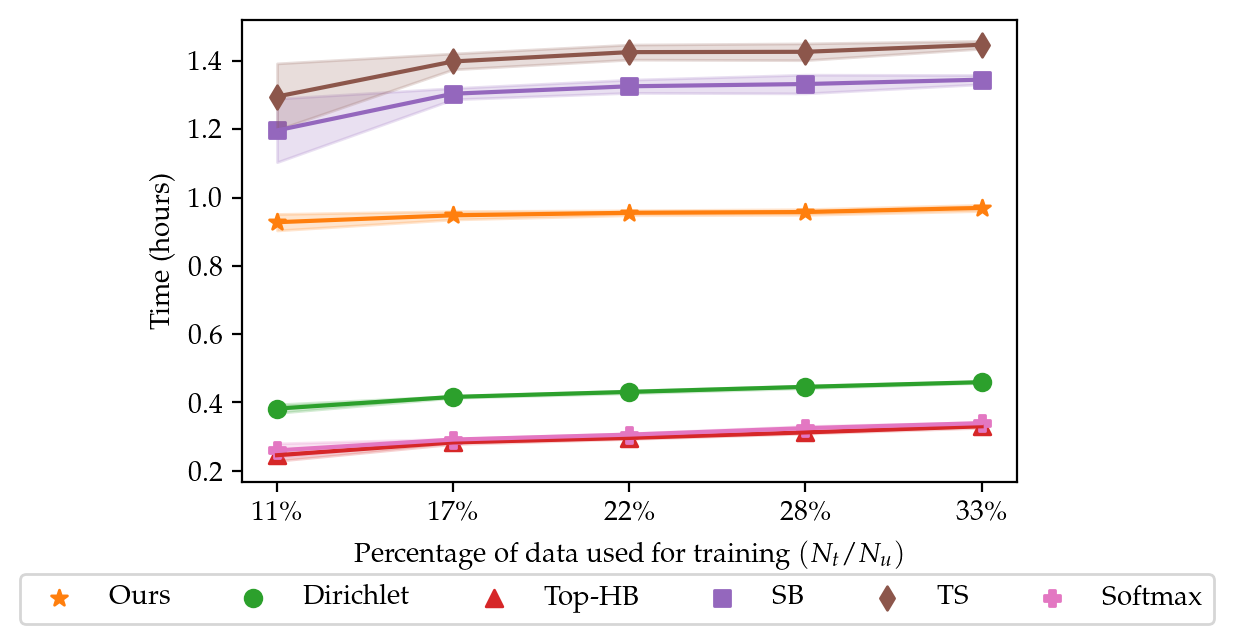

In [8]:
# Plot runtime 
fig, ax = plt.subplots(figsize=(5,3))
for m, label in legend_map.items():
    temp_df = df_aggregated[df_aggregated['calib_conf']['first'] == m]
    ax.plot(temp_df[f'{vary}']['first'], temp_df['hours_taken']['mean'], color=color_map[m])
    ax.fill_between(temp_df[f'{vary}']['first'], temp_df['hours_taken']['mean'] + temp_df['hours_taken']['std'] , temp_df['hours_taken']['mean'] - temp_df['hours_taken']['std'], color=color_map[m], alpha = 0.2)
    ax.scatter(temp_df[f'{vary}']['first'], temp_df['hours_taken']['mean'], label=label, marker=marker_map[m], color=color_map[m])
    
# ax.set_title('Time taken to complete TBAL')
ax.set_ylabel('Time (hours)')
ax.set_xlabel(f'{vary_identifier}')

# Set x ticks to be in percentage
prop = N
ax.set_xticks(temp_df[f'{vary}']['first'])
if prop is not None:
    ax.set_xticklabels(list(map(lambda x: f"{int(round(x,2) * 100)}\%", np.array(temp_df[f'{vary}']['first'])/ prop)))

# Set legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    fontsize=10,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=len(df["calib_conf"].unique()),
)

plt.savefig("Runtime_Nt.pdf", dpi=200, bbox_inches="tight")

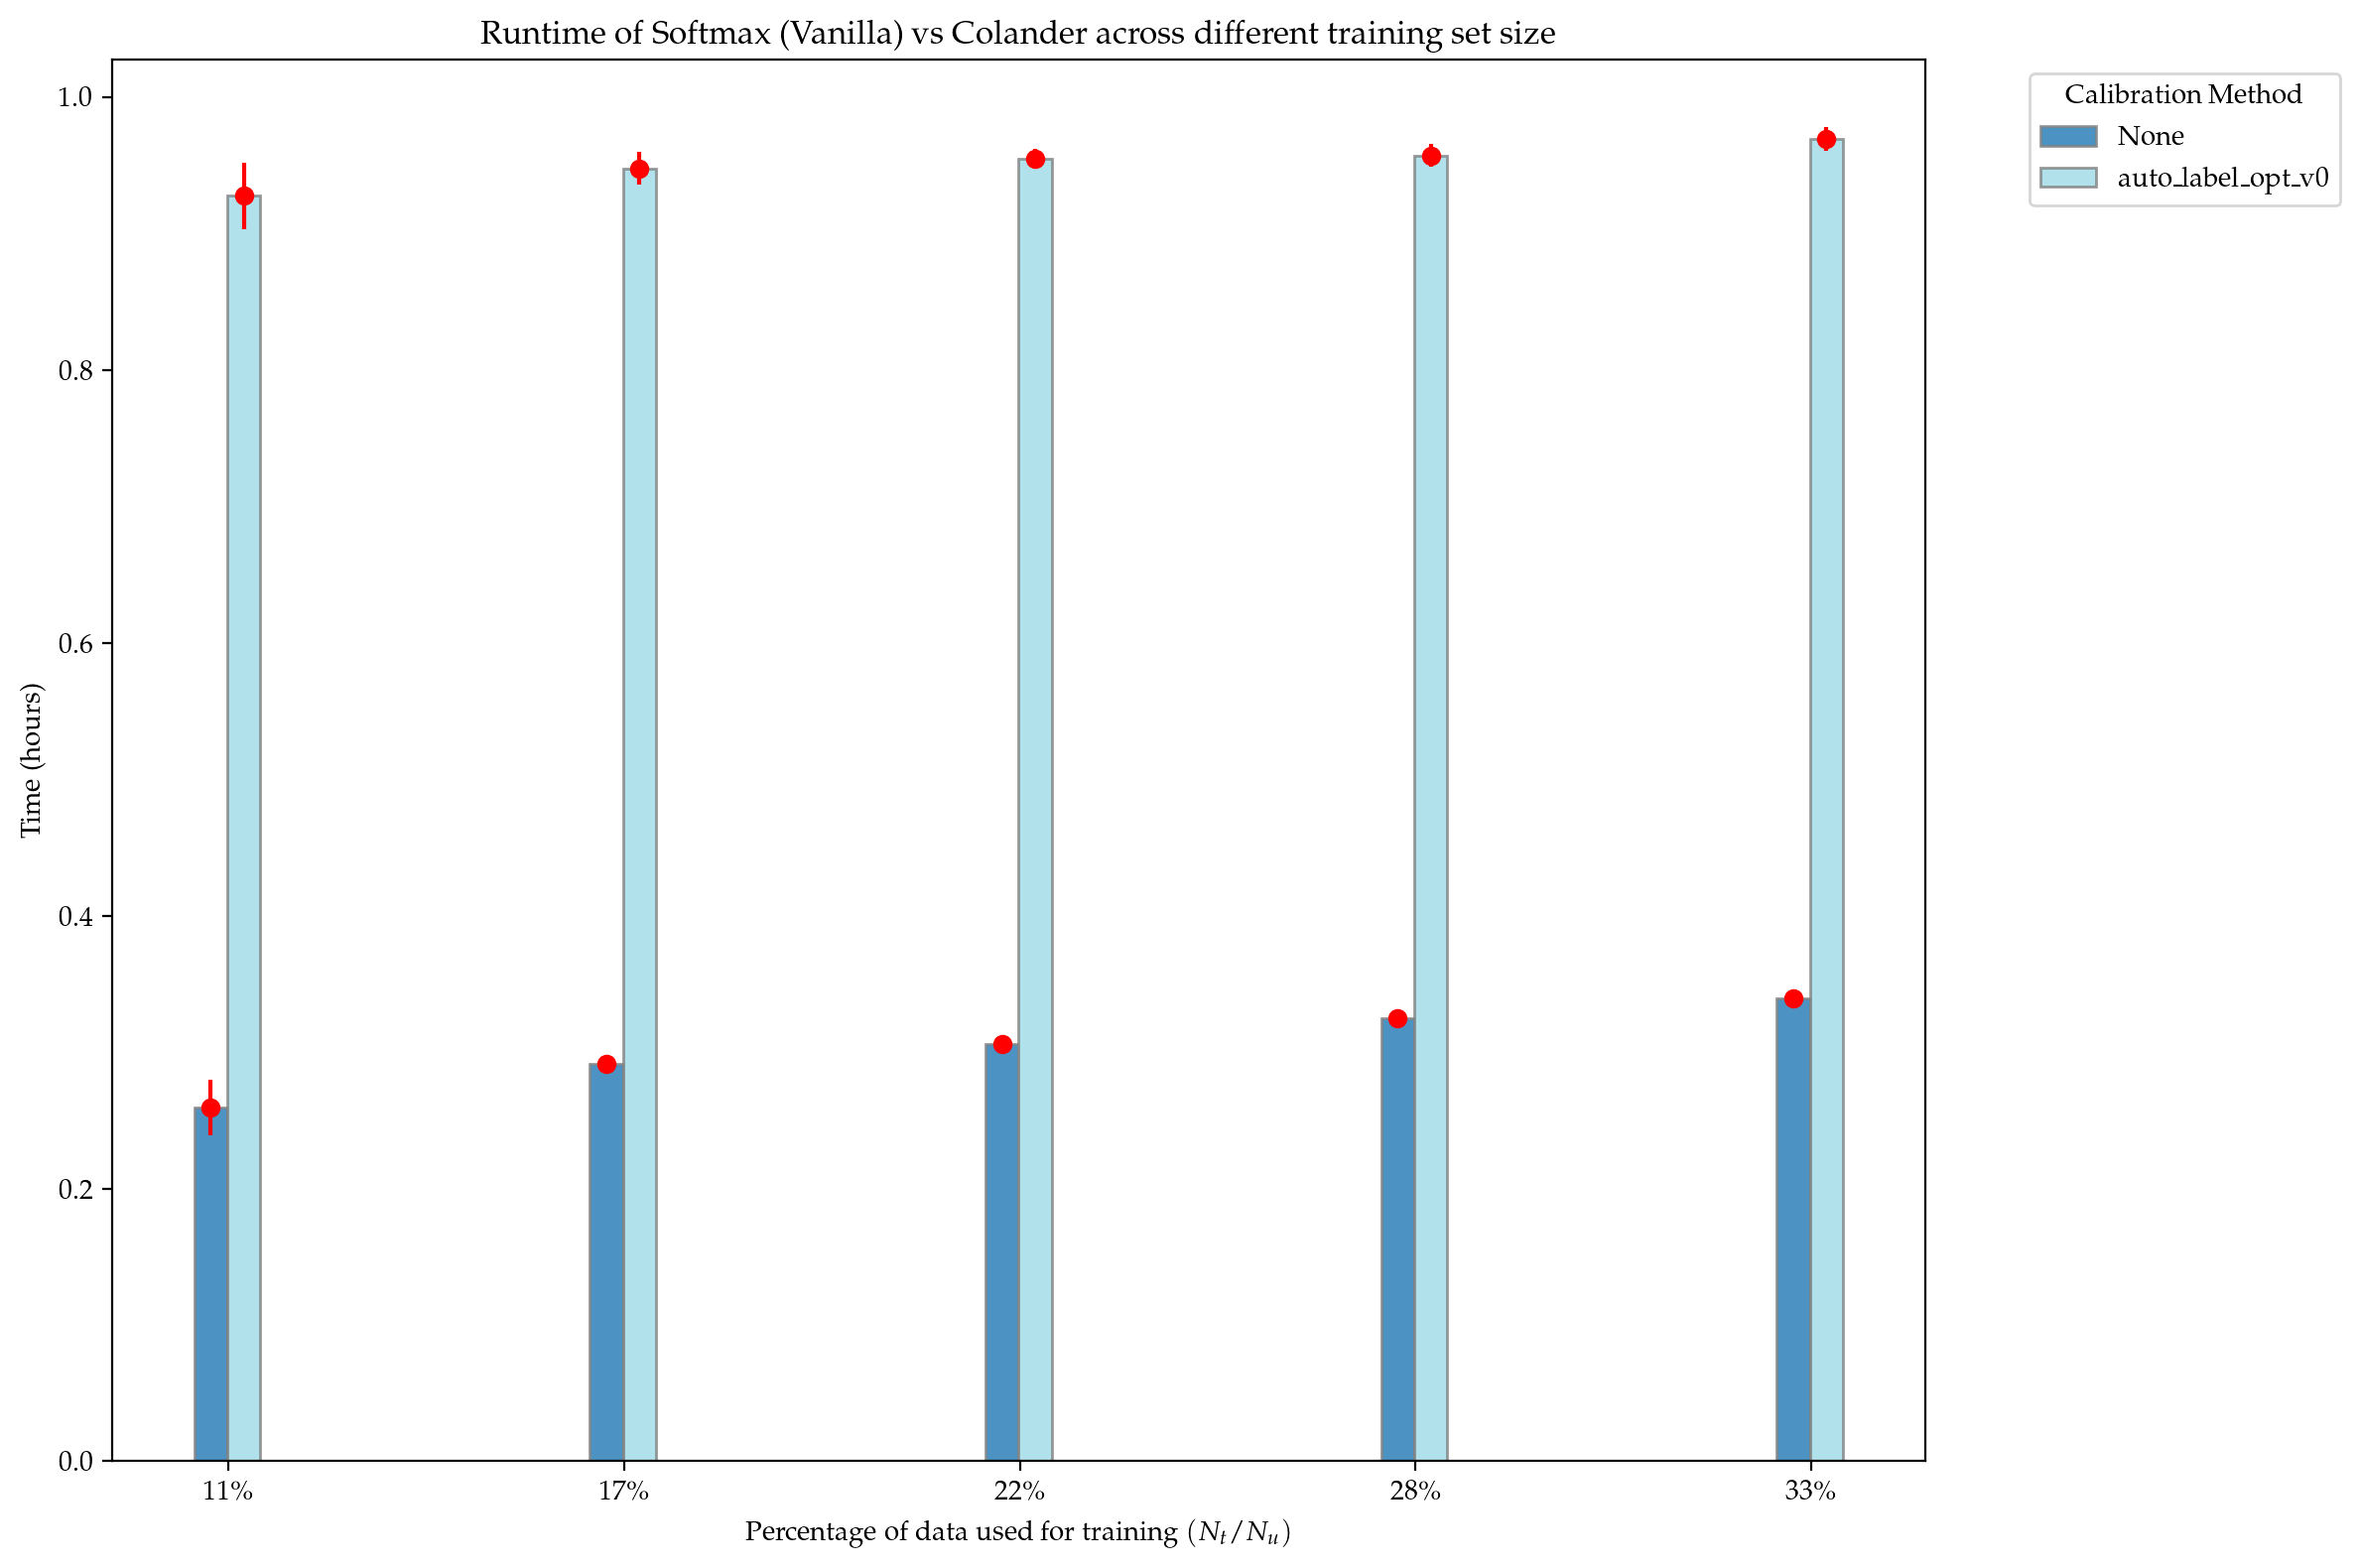

In [9]:

training_points = df_aggregated['max_num_train_pts']['first'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bar
bar_width = 0.15

# Set positions of the bars on the x-axis
r = np.arange(len(training_points))

# Filter to only retain selected calib_conf result to be plotted 
selected_calib_confs = ['None', 'auto_label_opt_v0']
df_aggregated = df_aggregated[df_aggregated[('calib_conf', 'first')].isin(selected_calib_confs)]
# display(df_aggregated)


calib_methods = df_aggregated['calib_conf']['first'].unique()

# Color palette for different methods
colors = plt.cm.tab20(np.linspace(0, 1, len(calib_methods)))
color_mapping = dict(zip(calib_methods, colors))

bar_width = 1 
space_between_groups = 10 
labels_added = set()

# Add dataframe filter for methods. Only retain specified methods.

# Loop through each method and plot
for i, n_train in enumerate(vary_values):
    # display(df_aggregated)
    subset = df_aggregated[(df_aggregated['max_num_train_pts']['first'] == int(n_train))]

    r = np.arange(len(calib_methods)) + i * (len(calib_methods) * bar_width + space_between_groups)
    # We need to calculate the x positions for the current method
    # ax.bar(subset['calib_conf']['first'], subset['hours_taken']['mean'], color=colors, width= 1, alpha = 0.5, edgecolor='grey', label=method)

    # if not labels_added:
    #     ax.bar(r, subset['hours_taken']['mean'], color=colors, width= 1, alpha = 0.5, edgecolor='grey', label=calib_methods)
    #     labels_added.update(list(calib_methods))
    # else:
    #     ax.bar(r, subset['hours_taken']['mean'], color=colors, width= 1, alpha = 0.5, edgecolor='grey')

    for j, method in enumerate(calib_methods):
        method_subset = subset[subset[('calib_conf', 'first')] == method]
        ax.bar(r[j], method_subset['hours_taken']['mean'].values[0], 
               color=color_mapping[method], width= bar_width , alpha=0.8, edgecolor='grey', 
               label=method if method not in labels_added else None)
        ax.errorbar(r[j], method_subset['hours_taken']['mean'].values[0], yerr= method_subset['hours_taken']['std'], fmt="o", color="r")

        labels_added.add(method)



ax.set_xlabel(vary_identifier, fontweight='bold')
ax.set_ylabel('Time (hours)', fontweight='bold')

# offset_of_x_ticks = 2.16
offset_of_x_ticks = 0.04
# Calculate group positions for x-ticks
group_positions = np.arange(len(training_points)) * (len(calib_methods) * bar_width + space_between_groups) + (len(calib_methods) * bar_width) / 2 - bar_width / 2 +  offset_of_x_ticks
ax.set_xticks(group_positions)
# ax.set_xticklabels(training_points, rotation=0, ha='center')
ax.set_xticklabels(list(map(lambda x: f"{int(round(x,2) * 100)}\%", np.array(temp_df[f'{vary}']['first'])/ prop)), rotation=0, ha='center')


# Create legend & Show graphic
plt.legend(title='Calibration Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Runtime of Softmax (Vanilla) vs Colander across different training set size')

plt.tight_layout()
plt.show()